DECISION TREE MARKS DATASET

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
import graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

In [ ]:
data=pd.read_csv("sem4data.csv")
data.head()

,course_id,mean,sd,marks,cat_1,cat_2,fat,grade
0,cse2012,69.70,10.56,79,19.0,9.30,70.0,A
1,cse2038,72.91,10.10,74,23.5,11.25,65.0,B
2,cse2039,78.11,7.71,90,29.0,12.00,73.0,S
3,ece2036,76.90,10.30,86,27.0,13.80,73.0,A
4,mat2010,74.01,8.28,86,23.0,10.50,81.0,A


In [ ]:
data=data.drop(data.columns[0],axis=1)
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
print(X)
print(y)

     mean     sd  marks  cat_1  cat_2    fat
0   69.70  10.56     79   19.0   9.30  70.00
1   72.91  10.10     74   23.5  11.25  65.00
2   78.11   7.71     90   29.0  12.00  73.00
3   76.90  10.30     86   27.0  13.80  73.00
4   74.01   8.28     86   23.0  10.50  81.00
5   80.01   6.76     88   22.0   9.30  80.00
6   80.62   5.76     86   20.0   8.50  71.67
7   81.52   6.17     91   19.0  12.75  95.00
8   76.04   8.78     87   28.0  12.00  87.00
9   80.34   9.53     93   27.0  13.50  88.33
10  87.59   3.25     88   23.0  12.00  80.00
11  84.00   9.52     94   29.0  12.00  95.00
0     A
1     B
2     S
3     A
4     A
5     B
6     A
7     S
8     S
9     S
10    B
11    A
Name: grade, dtype: object


In [ ]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)
print(y)
data.grade=y

[0 1 2 0 0 1 0 2 2 2 1 0]


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)
print("training dataset:\n",xtrain,"\n",ytrain)
print("\ntesting dataset:\n",xtest,"\n",ytest)

training dataset:
      mean     sd  marks  cat_1  cat_2    fat
10  87.59   3.25     88   23.0  12.00  80.00
1   72.91  10.10     74   23.5  11.25  65.00
6   80.62   5.76     86   20.0   8.50  71.67
0   69.70  10.56     79   19.0   9.30  70.00
7   81.52   6.17     91   19.0  12.75  95.00
11  84.00   9.52     94   29.0  12.00  95.00
9   80.34   9.53     93   27.0  13.50  88.33
8   76.04   8.78     87   28.0  12.00  87.00
5   80.01   6.76     88   22.0   9.30  80.00 
 [1 1 0 0 2 0 2 2 1]

testing dataset:
     mean     sd  marks  cat_1  cat_2   fat
2  78.11   7.71     90   29.0   12.0  73.0
3  76.90  10.30     86   27.0   13.8  73.0
4  74.01   8.28     86   23.0   10.5  81.0 
 [2 0 0]


In [ ]:
#GINI INDEX
dt=tree.DecisionTreeClassifier()
model= dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print("the predicted y values: ",ypred)
print("the test y values: ",ytest)
print("the score for the training data set is: ",model.score(xtest,ytest))

the predicted y values:  [1 1 1]
the test y values:  [2 0 0]
the score for the training data set is:  0.0


[Text(0.5, 0.8333333333333334, 'X[5] <= 83.5\ngini = 0.667\nsamples = 9\nvalue = [3, 3, 3]'),
 Text(0.25, 0.5, 'X[3] <= 21.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3, 0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.75, 0.5, 'X[3] <= 28.5\ngini = 0.375\nsamples = 4\nvalue = [1, 0, 3]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]')]

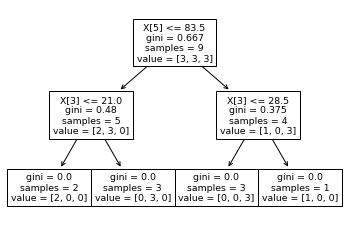

In [ ]:
tree.plot_tree(model)

In [ ]:
#confusion matrix
con_mat = confusion_matrix(ytest,ypred)
print("Confusion matrix: \n", con_mat)
print("score: ", model.score(xtest,ytest))

Confusion matrix: 
 [[0 2 0]
 [0 0 0]
 [0 1 0]]
score:  0.0


the predicted y values:  [1 1 1]
the test y values:  [2 0 0]
the score for the training data set is:  0.0


[Text(0.5, 0.8333333333333334, 'X[5] <= 83.5\nentropy = 1.585\nsamples = 9\nvalue = [3, 3, 3]'),
 Text(0.25, 0.5, 'X[3] <= 21.0\nentropy = 0.971\nsamples = 5\nvalue = [2, 3, 0]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(0.75, 0.5, 'X[2] <= 93.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 0, 3]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]')]

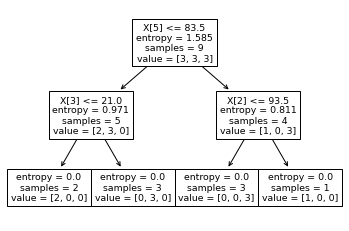

In [ ]:
#ENTROPY
dt=tree.DecisionTreeClassifier(criterion='entropy')
model1= dt.fit(xtrain,ytrain)
ypred1=dt.predict(xtest)
print("the predicted y values: ",ypred)
print("the test y values: ",ytest)
print("the score for the training data set is: ",model1.score(xtest,ytest))
tree.plot_tree(model1)

In [ ]:
#confusion matrix
con_mat = confusion_matrix(ytest,ypred1)
print("Confusion matrix: \n", con_mat)
print("score: ", model.score(xtest,ytest))

Confusion matrix: 
 [[0 2 0]
 [0 0 0]
 [0 1 0]]
score:  0.0


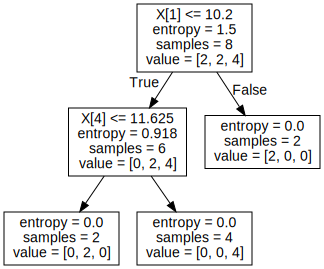

In [ ]:
treedata= tree.export_graphviz(model1, out_file=None)
graph = graphviz.Source(treedata)
graph.render("marks")
graph